# MadMiner particle physics tutorial

# Part 2b: Analyzing events at Delphes level

Johann Brehmer, Felix Kling, Irina Espejo, and Kyle Cranmer 2018-2019

In this second part of the tutorial, we'll generate events and extract the observables and weights from them. You have two options: In this notebook we'll do this with Delphes, in the alternative part 2a we stick to parton level.

## 0. Preparations

Before you execute this notebook, make sure you have working installations of MadGraph, Pythia, and Delphes.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import logging
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

from madminer.core import MadMiner
from madminer.delphes import DelphesReader
from madminer.sampling import combine_and_shuffle
from madminer.plotting import plot_distributions


In [2]:
# MadMiner output
logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.DEBUG
)

# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

Please enter here the path to your MG5 root directory. This notebook assumes that you installed Delphes and Pythia through MG5.

## 5. Plot distributions

Let's see what our MC run produced:

10:18 madminer.analysis    INFO    Loading data from data/delphes_data_shuffled.h5
10:18 madminer.analysis    INFO    Found 1 parameters
10:18 madminer.analysis    DEBUG      kapz (LHA: NEWCOUP 1, maximal power in squared ME: (4,), range: (0.0, 16.0))
10:18 madminer.analysis    INFO    Did not find nuisance parameters
10:18 madminer.analysis    INFO    Found 5 benchmarks, of which 5 physical
10:18 madminer.analysis    DEBUG      no-higgs: kapz = 0.00e+00
10:18 madminer.analysis    DEBUG      sm: kapz = 1.00
10:18 madminer.analysis    DEBUG      5-higgs: kapz = 5.00
10:18 madminer.analysis    DEBUG      16-higgs: kapz = 16.00
10:18 madminer.analysis    DEBUG      morphing_basis_vector_4: kapz = 12.11
10:18 madminer.analysis    INFO    Found 35 observables
10:18 madminer.analysis    DEBUG      0 delta_phi_jj
10:18 madminer.analysis    DEBUG      1 delta_eta_jj
10:18 madminer.analysis    DEBUG      2 invmass_jj
10:18 madminer.analysis    DEBUG      3 m4l
10:18 madminer.analysis    DEBUG  

10:19 madminer.plotting    DEBUG   Plotting panel 13: observable 13, label e_l2
10:19 madminer.plotting    DEBUG   Ranges for observable e_l2: min = [13.00348552215557, 13.00348552215557, 13.00348552215557, 13.00348552215557, 13.00348552215557], max = [813.6891009746201, 756.3965454044426, 706.0585432011542, 764.8149156331601, 936.924896135997]
10:19 madminer.plotting    DEBUG   Plotting panel 14: observable 14, label pt_l2
10:19 madminer.plotting    DEBUG   Ranges for observable pt_l2: min = [12.479242324829102, 12.479242324829102, 12.479242324829102, 12.479242324829102, 12.479242324829102], max = [483.52504942350834, 446.168057945677, 399.57214308283176, 483.478760582787, 560.9554342013228]
10:19 madminer.plotting    DEBUG   Plotting panel 15: observable 15, label eta_l2
10:19 madminer.plotting    DEBUG   Ranges for observable eta_l2: min = [-2.491857515698863, -2.499968051910401, -2.499968051910401, -2.4697400006262575, -2.4073108981385216], max = [2.4531626022269863, 2.468377154972

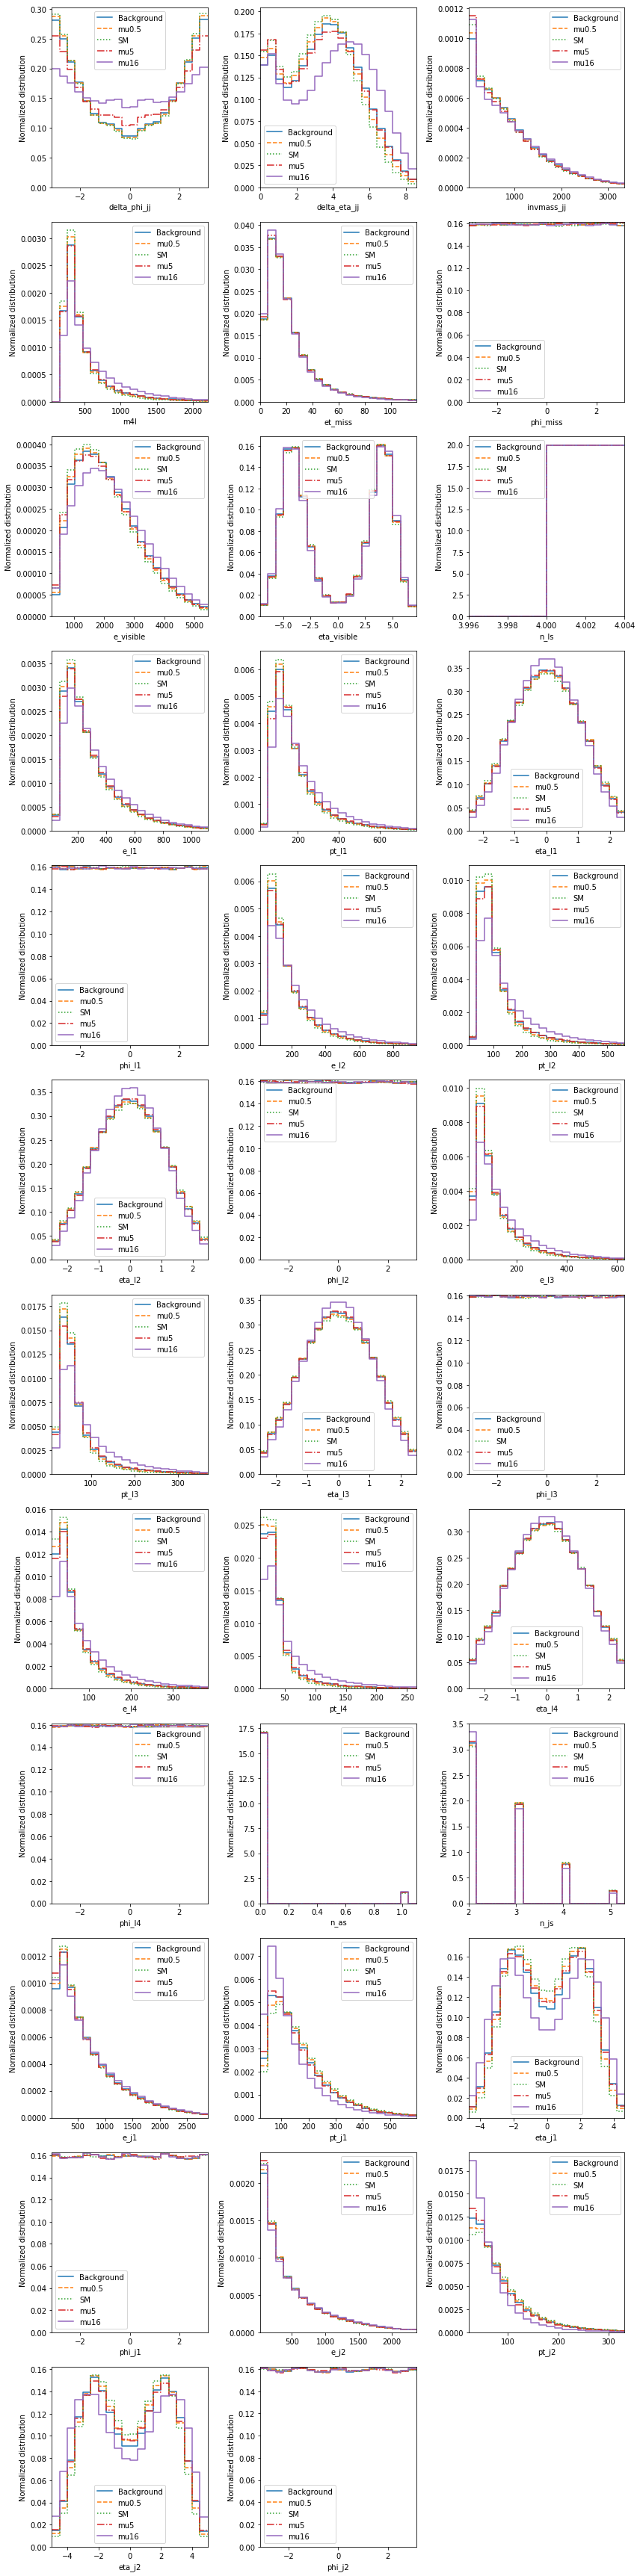

In [4]:
_ = plot_distributions(
    filename='data/delphes_data_shuffled.h5',
    parameter_points=['no-higgs', [0.5], 'sm', [5.], '16-higgs'],
    line_labels=['Background', 'mu0.5', 'SM', 'mu5', 'mu16'],
    uncertainties='none',
    n_bins=20,
    n_cols=3,
    normalize=True,
)

10:19 madminer.analysis    INFO    Loading data from data/delphes_data_shuffled.h5
10:19 madminer.analysis    INFO    Found 1 parameters
10:19 madminer.analysis    DEBUG      kapz (LHA: NEWCOUP 1, maximal power in squared ME: (4,), range: (0.0, 16.0))
10:19 madminer.analysis    INFO    Did not find nuisance parameters
10:19 madminer.analysis    INFO    Found 5 benchmarks, of which 5 physical
10:19 madminer.analysis    DEBUG      no-higgs: kapz = 0.00e+00
10:19 madminer.analysis    DEBUG      sm: kapz = 1.00
10:19 madminer.analysis    DEBUG      5-higgs: kapz = 5.00
10:19 madminer.analysis    DEBUG      16-higgs: kapz = 16.00
10:19 madminer.analysis    DEBUG      morphing_basis_vector_4: kapz = 12.11
10:19 madminer.analysis    INFO    Found 35 observables
10:19 madminer.analysis    DEBUG      0 delta_phi_jj
10:19 madminer.analysis    DEBUG      1 delta_eta_jj
10:19 madminer.analysis    DEBUG      2 invmass_jj
10:19 madminer.analysis    DEBUG      3 m4l
10:19 madminer.analysis    DEBUG  

10:20 madminer.plotting    DEBUG   Plotting panel 13: observable 13, label e_l2
10:20 madminer.plotting    DEBUG   Ranges for observable e_l2: min = [13.00348552215557, 13.00348552215557, 13.00348552215557, 13.00348552215557, 13.00348552215557], max = [721.6313316704503, 688.1687528051032, 669.67475071189, 747.6563791164257, 844.1606384671416]
10:20 madminer.plotting    DEBUG   Plotting panel 14: observable 14, label pt_l2
10:20 madminer.plotting    DEBUG   Ranges for observable pt_l2: min = [12.479242324829102, 12.479242324829102, 12.479242324829102, 12.479242324829102, 12.479242324829102], max = [461.7549396601819, 425.00863941018315, 385.74098457263835, 468.14600633087866, 555.9868789056131]
10:20 madminer.plotting    DEBUG   Plotting panel 15: observable 15, label eta_l2
10:20 madminer.plotting    DEBUG   Ranges for observable eta_l2: min = [-2.4816846809023536, -2.4988744949558166, -2.499968051910401, -2.480088094222953, -2.412301084815172], max = [2.4232962727244565, 2.4359922194

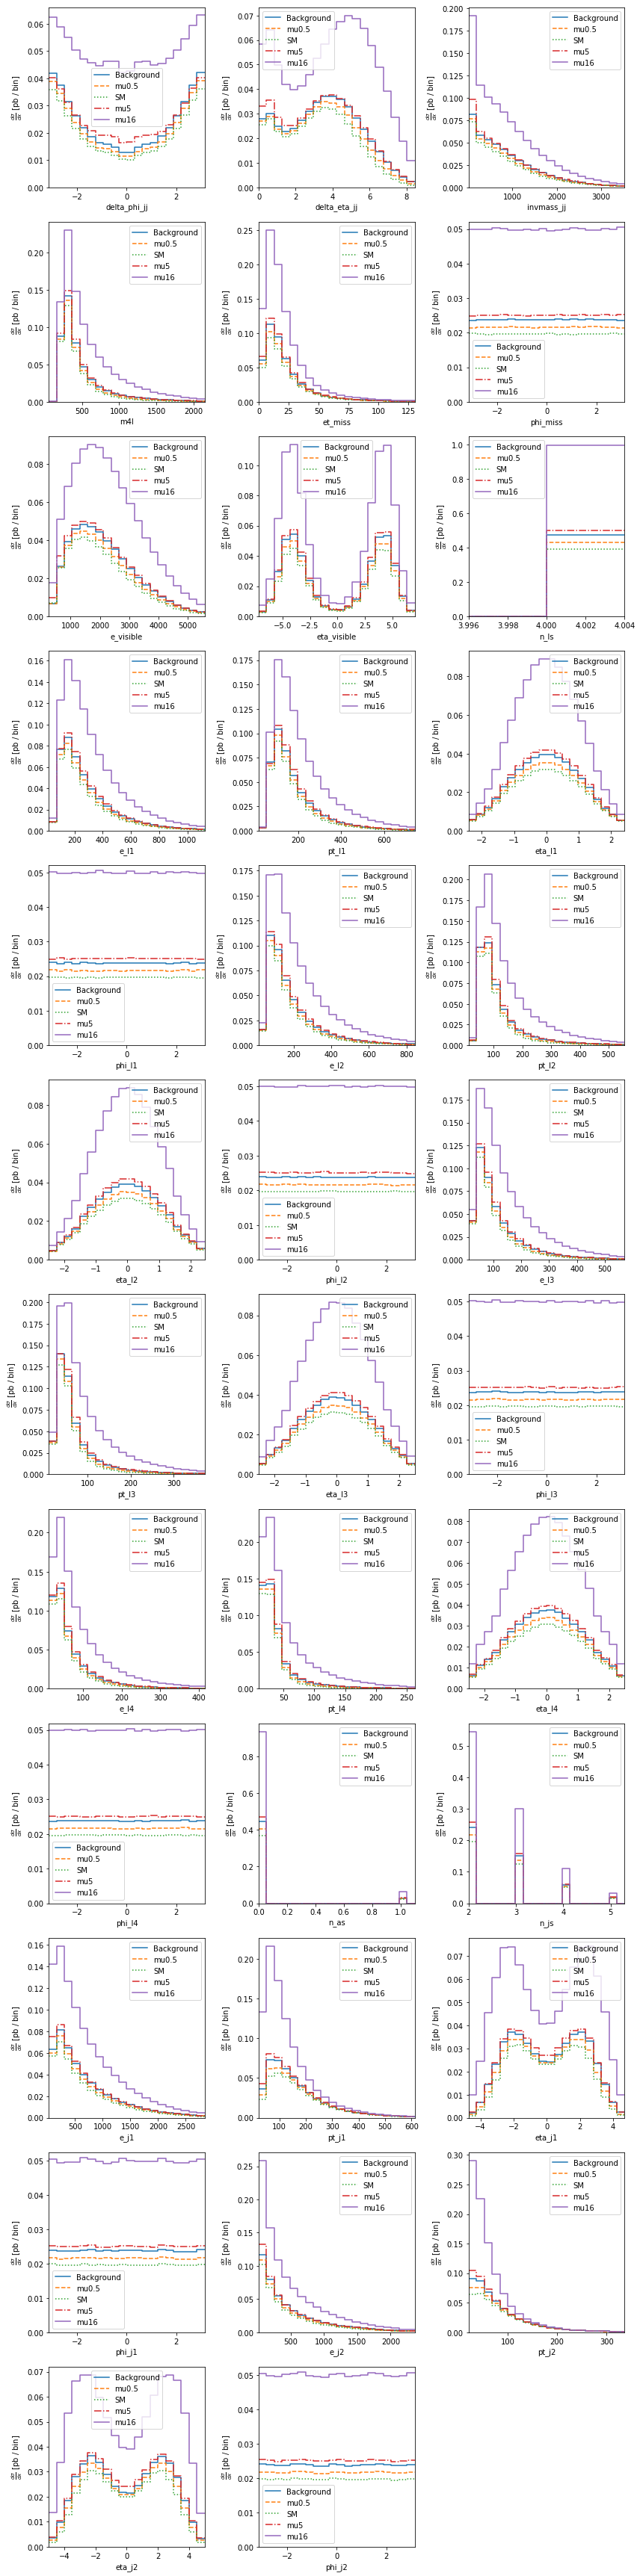

In [5]:
_ = plot_distributions(
    filename='data/delphes_data_shuffled.h5',
    parameter_points=['no-higgs', [0.5], 'sm', [5.], '16-higgs'],
    line_labels=['Background', 'mu0.5', 'SM', 'mu5', 'mu16'],
    uncertainties='none',
    n_bins=20,
    n_cols=3,
    normalize=False,
)

10:24 madminer.analysis    INFO    Loading data from data/delphes_data_shuffled.h5
10:24 madminer.analysis    INFO    Found 1 parameters
10:24 madminer.analysis    DEBUG      kapz (LHA: NEWCOUP 1, maximal power in squared ME: (4,), range: (0.0, 16.0))
10:24 madminer.analysis    INFO    Did not find nuisance parameters
10:24 madminer.analysis    INFO    Found 5 benchmarks, of which 5 physical
10:24 madminer.analysis    DEBUG      no-higgs: kapz = 0.00e+00
10:24 madminer.analysis    DEBUG      sm: kapz = 1.00
10:24 madminer.analysis    DEBUG      5-higgs: kapz = 5.00
10:24 madminer.analysis    DEBUG      16-higgs: kapz = 16.00
10:24 madminer.analysis    DEBUG      morphing_basis_vector_4: kapz = 12.11
10:24 madminer.analysis    INFO    Found 35 observables
10:24 madminer.analysis    DEBUG      0 delta_phi_jj
10:24 madminer.analysis    DEBUG      1 delta_eta_jj
10:24 madminer.analysis    DEBUG      2 invmass_jj
10:24 madminer.analysis    DEBUG      3 m4l
10:24 madminer.analysis    DEBUG  

10:25 madminer.plotting    DEBUG   Plotting panel 13: observable 13, label e_l2
10:25 madminer.plotting    DEBUG   Ranges for observable e_l2: min = [13.00348552215557, 13.00348552215557, 13.00348552215557, 13.00348552215557, 13.00348552215557], max = [759.186055060691, 721.6844888544767, 691.943340167957, 760.6778368231671, 845.2057769973957]
10:25 madminer.plotting    DEBUG   Plotting panel 14: observable 14, label pt_l2
10:25 madminer.plotting    DEBUG   Ranges for observable pt_l2: min = [12.479242324829102, 12.479242324829102, 12.479242324829102, 12.479242324829102, 12.479242324829102], max = [456.7134216785356, 427.41996337424763, 406.6072933600227, 466.6786685944863, 523.192727095199]
10:25 madminer.plotting    DEBUG   Plotting panel 15: observable 15, label eta_l2
10:25 madminer.plotting    DEBUG   Ranges for observable eta_l2: min = [-2.4255967948833046, -2.436095463469291, -2.4473141625473787, -2.408346658682253, -2.3626293259495594], max = [2.449265333161695, 2.4610903994321

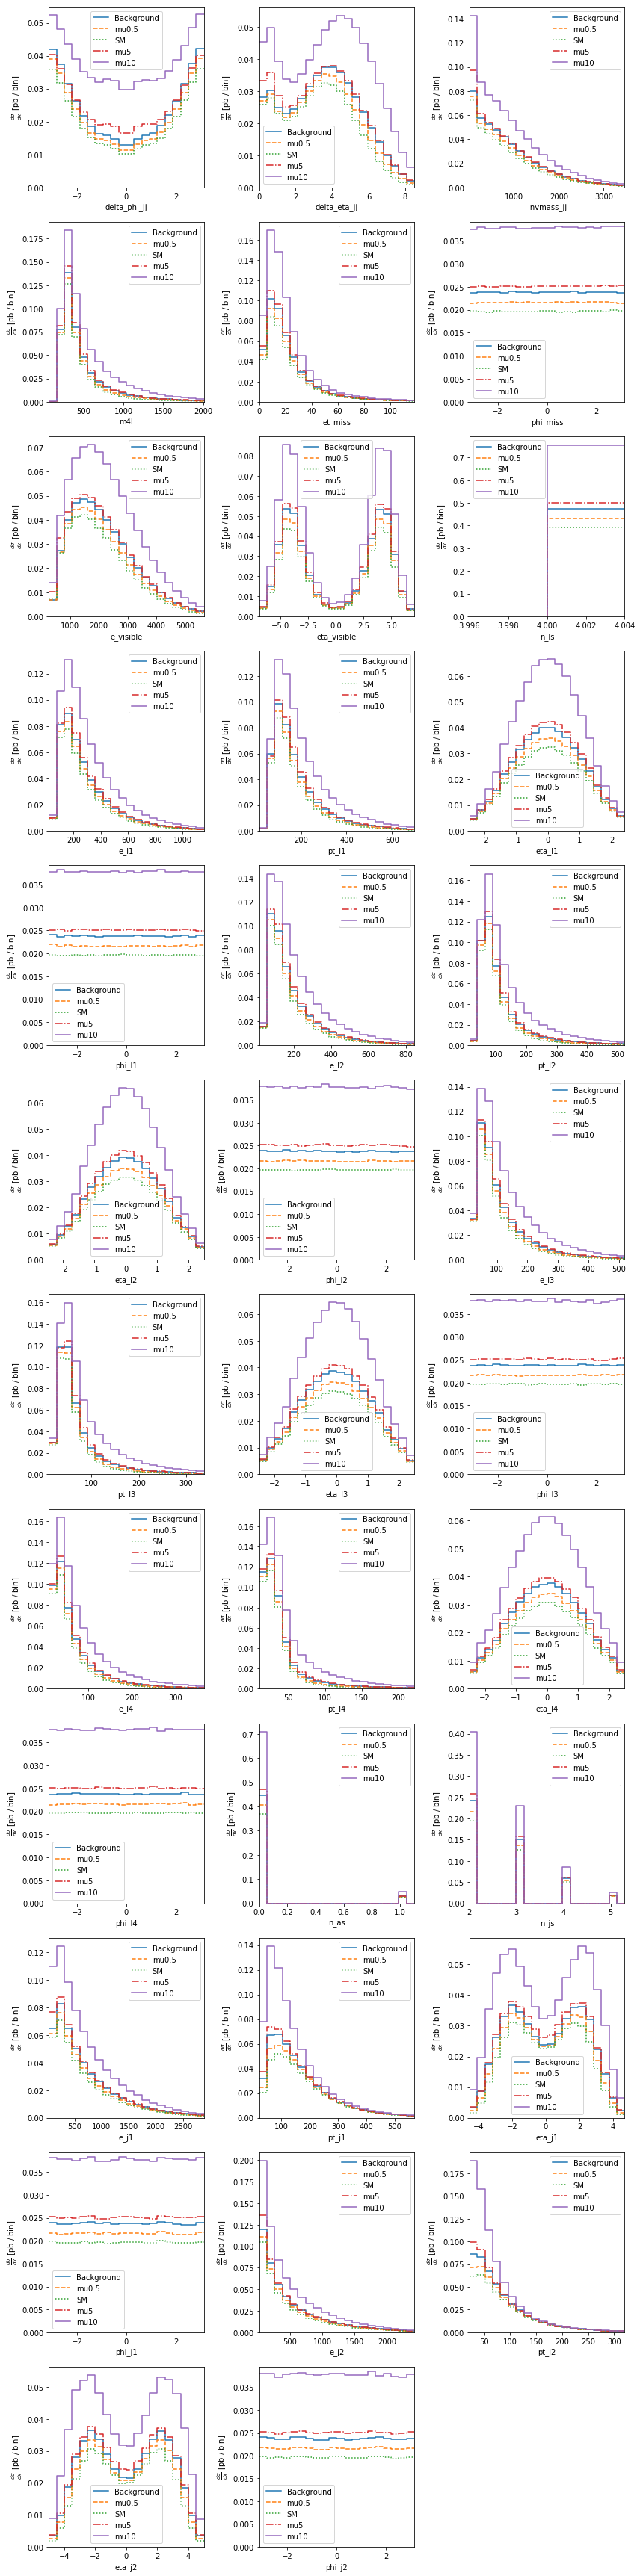

In [6]:
_ = plot_distributions(
    filename='data/delphes_data_shuffled.h5',
    parameter_points=['no-higgs', [0.5], 'sm', [5.], [10.]],
    line_labels=['Background', 'mu0.5', 'SM', 'mu5', 'mu10'],
    uncertainties='none',
    n_bins=20,
    n_cols=3,
    normalize=False,
)